# Graph Generation and EM on those Graphs



## How it Works

- **Generate Graphs** \\
If you want to generate a graph, you need to provide the model with the prior \(\pi\), \(\alpha\), and the number of vertices you want.
You can call the generator with the function `generate` that will return the generated graph, or `generate_and_give_tau` that will return a tuple with the generated graph, and a vector to explain to which clusters all nodes belong.

- **Estimate Parameters**  \\
    - To estimate the parameters of a graph, you first need to initialize a model. To do this, you can call the `mixtureModel` class. \\
    - Then, you can fit the data with the model by calling the `fit` function. You need to specify the number of clusters you want for your fit, and you can also provide the model with a list of number of clusters. You may want to add an initialization method for the first values of \(\tau\), to test the model with several initialization methods.

- **Plot the results** \\
    All the functions to plot the results are in the mixtureModel class.  
    - `plotJRX` will plot the values of the $\mathcal{J}(R_{\mathcal(X)}) for all the clusters that has been studied
    - `plotICL` will plot the values of the ICL which is the value that we use to find the good number of clusters
    - `plot_adjency_matrix` will plot the adjency matrices of the final model. If you do not precise any value for the number of clusters, it will plot all the adjency matrix, or just one if you precise the one you want. You may also want to see the labels of the nodes in the adjency matrix, that you can do using using show_names = True

- **Generate a new graph ** \\
    - Finaly, you can generate a new graph with the values of the model. To access those values, you can use the dictionary of the mixtureModel, with the number of clusters you need. It will give you another dictionnary with the returned 'tau', 'pi', 'prior' .. values that you can use. 
    - You can finish ploting the orignal graph and the generated one. To do so, use the function show_colors_multiple_graph, were you give the two graphs, their respective tau values (to add the color on the clusters) and the titles that you want for your two graphs.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

from utils import show_graph, show_multiple_graph, show_graph_cluster_color, show_colors_multiple_graph
from generator import generate, generate_and_give_tau

from EM_torch import mixtureModel, return_priors_pi_from_graph

### First easy examples

This first example is a simple graph with only two clusters. The model converged quickly to the solution with two clusters. 
The second one is even more easy. Even if the values $\pi$ are only zeros and ones, the model converges. 
Finaly, the third one is a star graph. This one may look more difficult, as we need to highlight the fact that there is no connections between the edges of the same clusters. The model converge in this situation too. 

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


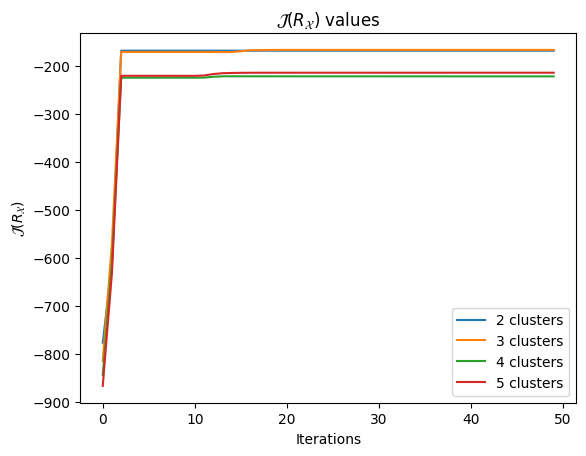

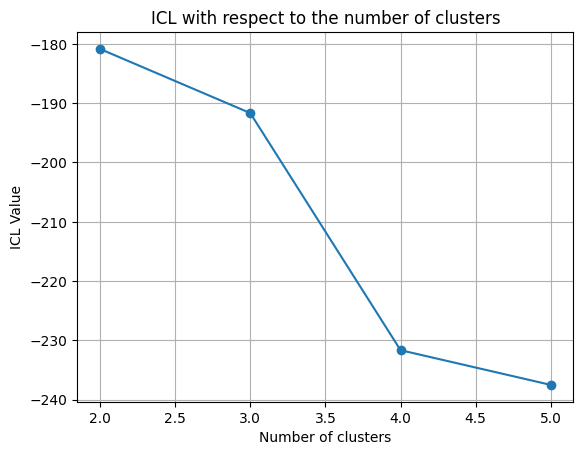

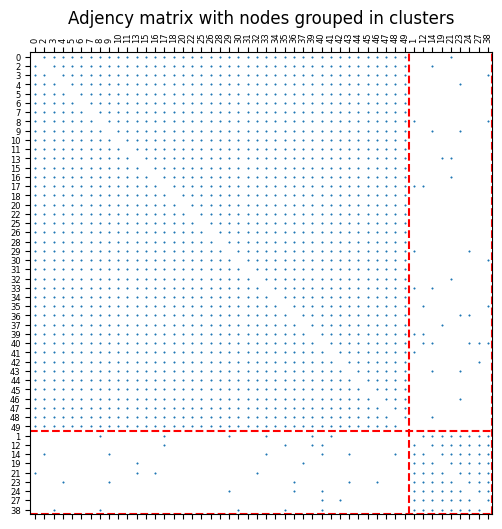

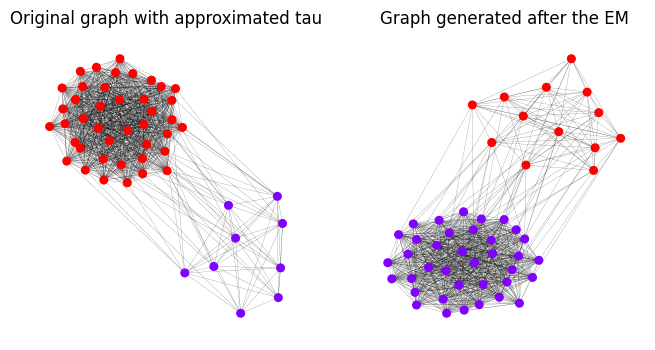

In [10]:
np.random.seed(2)
n_vertices = 50
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([0.2,0.8])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters, show_names=True)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[tau, new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


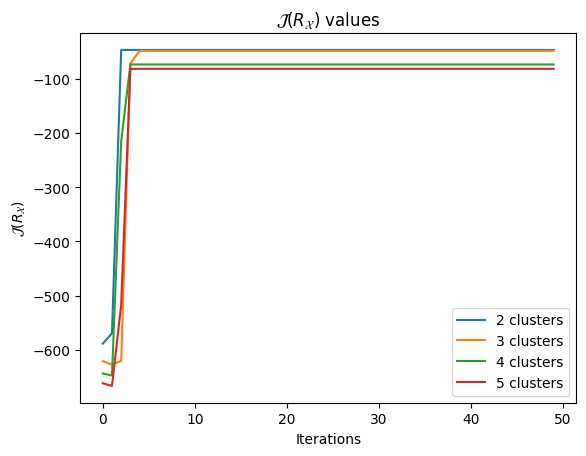

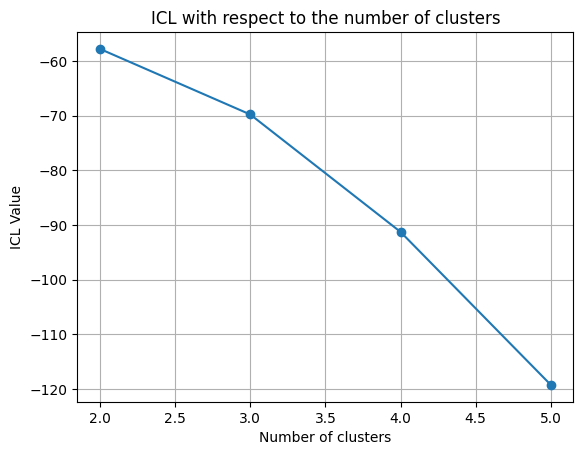

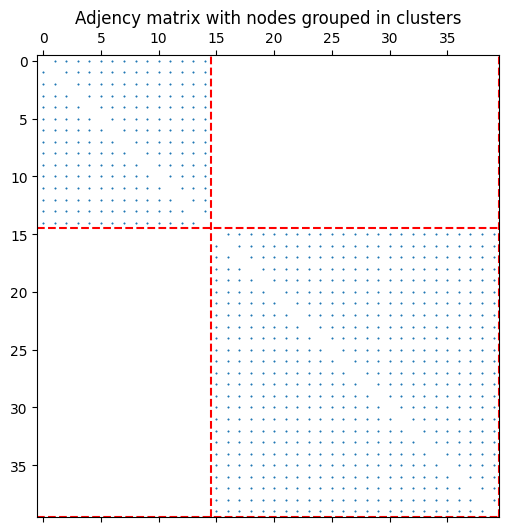

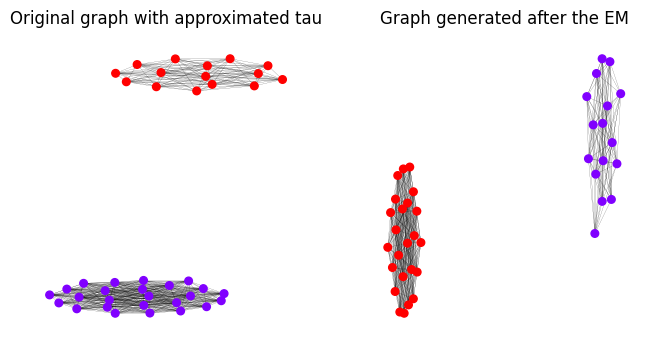

In [11]:
np.random.seed(2)
n_vertices = 40
pi = np.array([[1,0],[0,1]])
priors = np.array([0.5,0.5])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[tau, new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


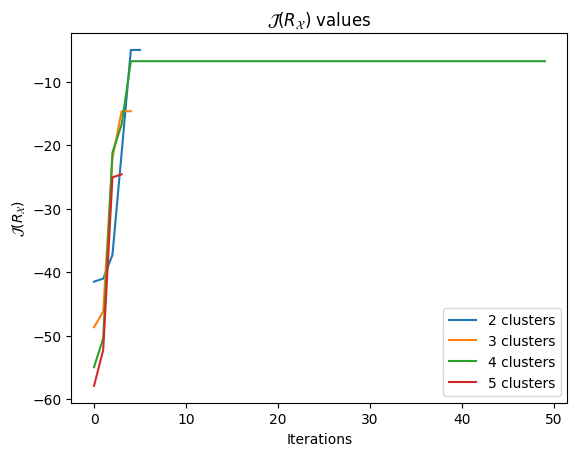

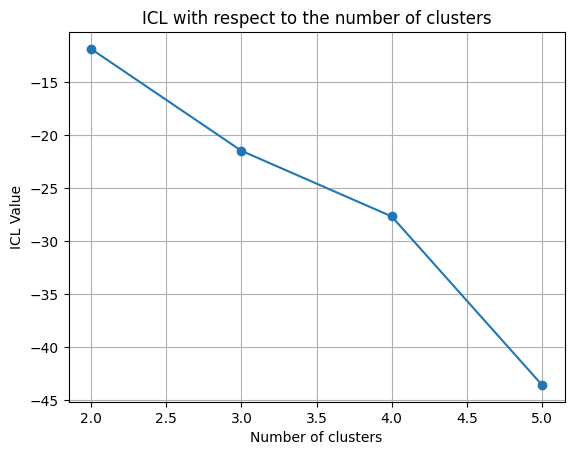

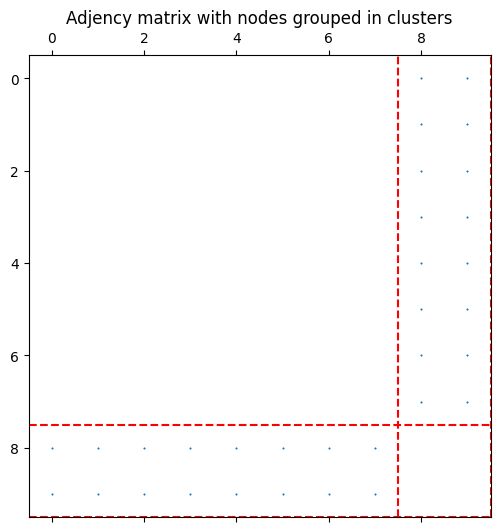

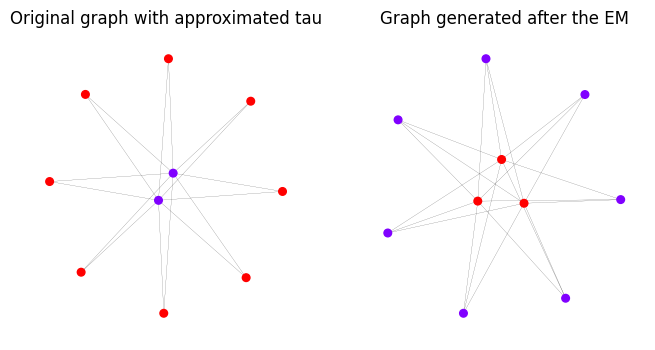

In [12]:
np.random.seed(1)
n_vertices = 10
pi = np.array([[0,1],[1,0]])
priors = np.array([0.1,0.9])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[tau, new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])


### Second set of examples

Now we want to empirically show that the initial values of the distribution between classes does have an impact on the final results. In particular, we emplained why the convergence of the algorithm may be more difficult 

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


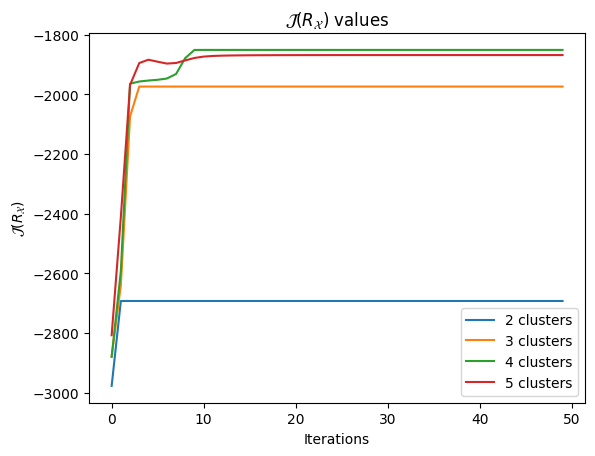

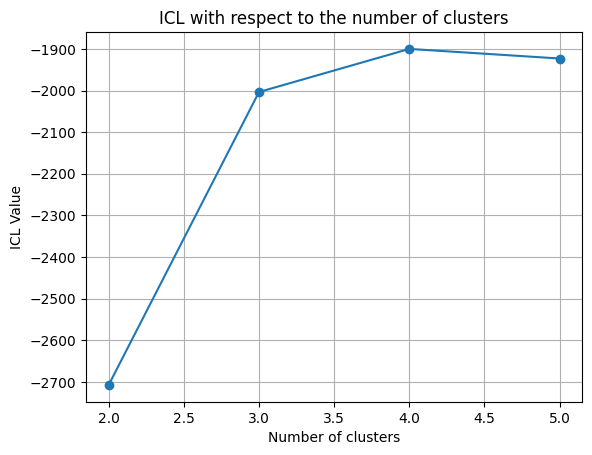

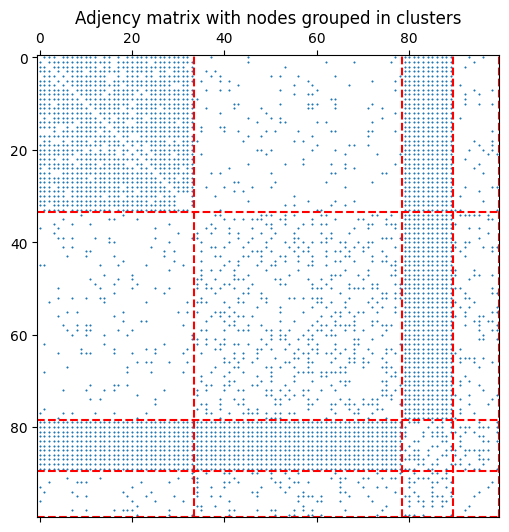

The true priors is :
 [0.1  0.45 0.11 0.34]
And the estimated one is :
 [0.34 0.45 0.11 0.1 ]
The true pi is :
 [[0.06  0.207 0.391 0.109]
 [0.207 0.285 1.    0.095]
 [0.391 1.    0.496 1.   ]
 [0.109 0.095 1.    0.875]]
And the estimated one is :
 [[0.875 0.095 1.    0.109]
 [0.095 0.285 1.    0.207]
 [1.    1.    0.496 0.391]
 [0.109 0.207 0.391 0.06 ]]


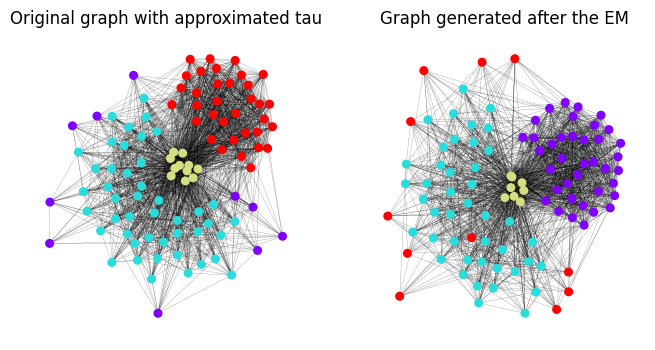

In [5]:
n_vertices = 100

pi = np.array([[0.1  , 0.2, 0.4, 0.1],
               [0.2  , 0.3, 1  , 0.1],
               [0.4  , 1  , 0.4,   1],
               [0.1  , 0.1, 1  ,0.9 ]])
priors = np.array([0.1, 0.4, 0.1, 0.4])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='spectral')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

np.set_printoptions(precision=3)
priors, pi  = return_priors_pi_from_graph(graph, tau)
print('The true priors is :\n',priors)
print('And the estimated one is :\n',model.results[true_n_clusters]['priors'])

print('The true pi is :\n',pi)
print('And the estimated one is :\n',model.results[true_n_clusters]['pi'])

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[tau, new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])


Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


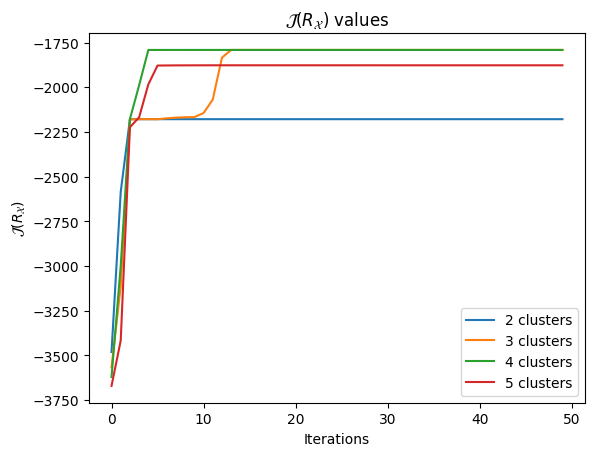

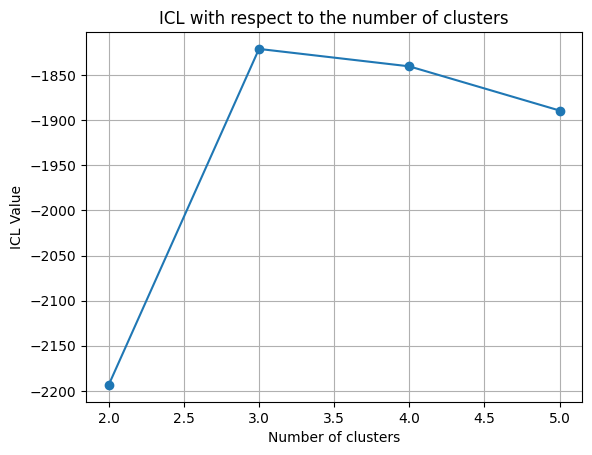

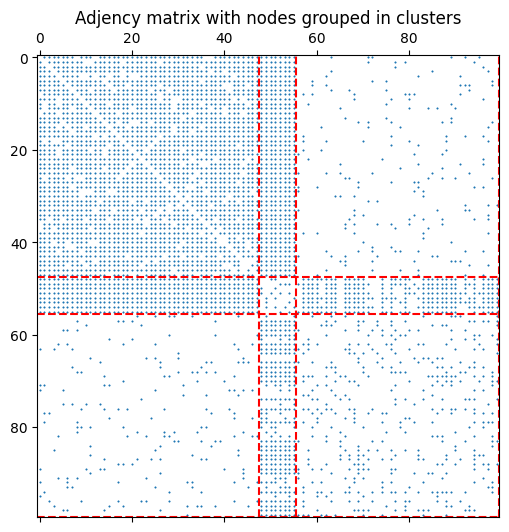

The true priors is :
 [0.16 0.28 0.08 0.48]
And the estimated one is :
 [4.799e-01 8.000e-02 4.400e-01 6.245e-05]
The true pi is :
 [[0.07  0.19  0.352 0.102]
 [0.19  0.281 1.    0.085]
 [0.352 1.    0.344 1.   ]
 [0.102 0.085 1.    0.888]]
And the estimated one is :
 [[0.888 1.    0.091 0.888]
 [1.    0.344 0.764 1.   ]
 [0.091 0.764 0.211 0.091]
 [0.888 1.    0.091 0.888]]


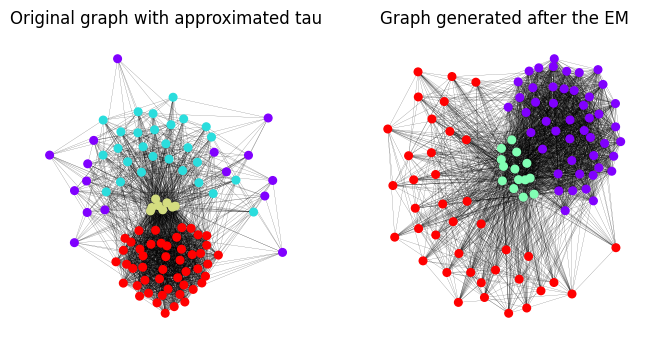

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


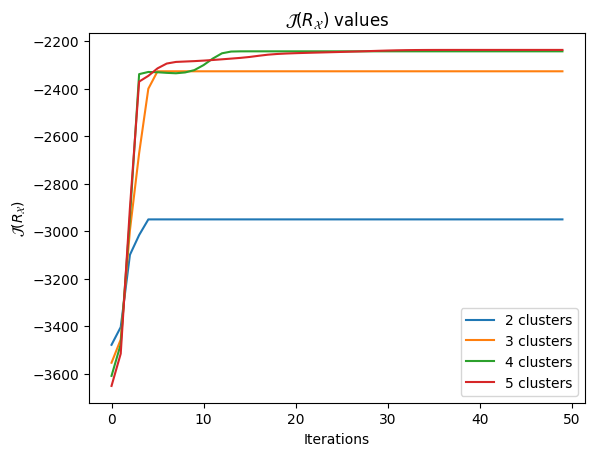

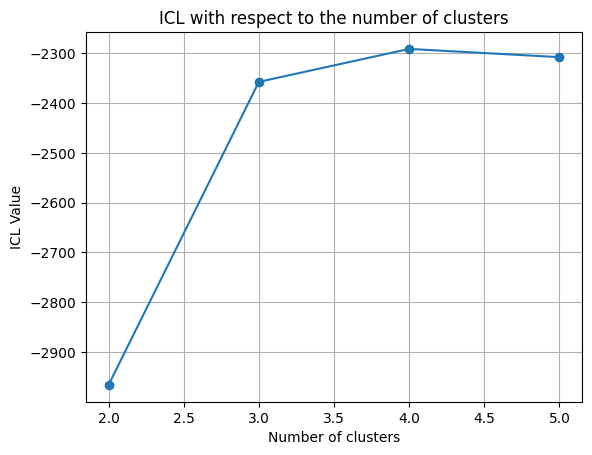

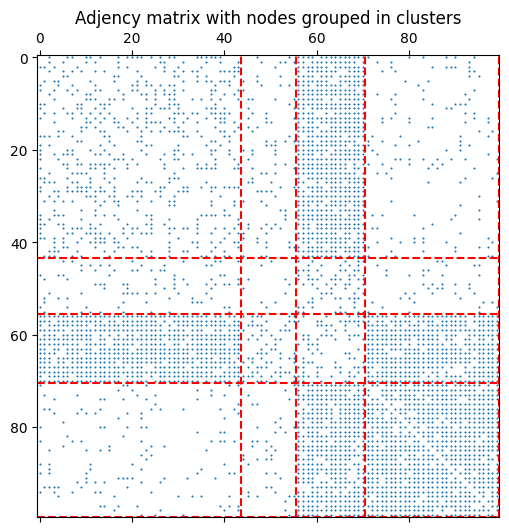

The true priors is :
 [0.11 0.45 0.15 0.29]
And the estimated one is :
 [0.443 0.117 0.15  0.29 ]
The true pi is :
 [[0.05  0.174 0.382 0.129]
 [0.174 0.304 0.889 0.105]
 [0.382 0.889 0.364 0.88 ]
 [0.129 0.105 0.88  0.875]]
And the estimated one is :
 [[0.309 0.173 0.892 0.107]
 [0.173 0.063 0.399 0.121]
 [0.892 0.399 0.364 0.88 ]
 [0.107 0.121 0.88  0.875]]


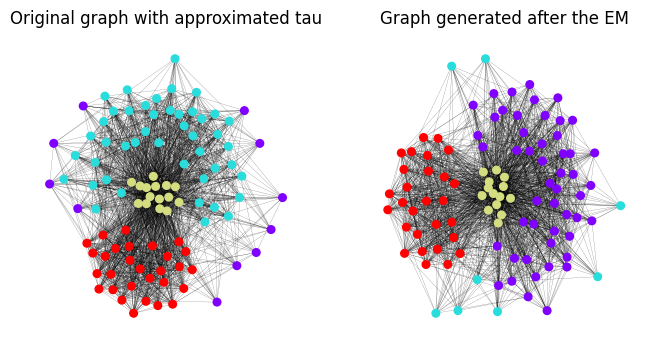

In [4]:
np.random.seed(2)
n_vertices = 100
pi = np.array([[0.1  , 0.2, 0.4  , 0.1],
               [0.2  , 0.3, 0.9  , 0.1],
               [0.4  , 0.9, 0.4  , 0.9],
               [0.1  , 0.1, 0.9  , 0.9]])
priors = np.array([0.1, 0.4, 0.1, 0.4])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

np.set_printoptions(precision=3)
priors, pi  = return_priors_pi_from_graph(graph, tau)
print('The true priors is :\n',priors)
print('And the estimated one is :\n',model.results[true_n_clusters]['priors'])
print('The true pi is :\n',pi)
print('And the estimated one is :\n',model.results[true_n_clusters]['pi'])


new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[tau, new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])


Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


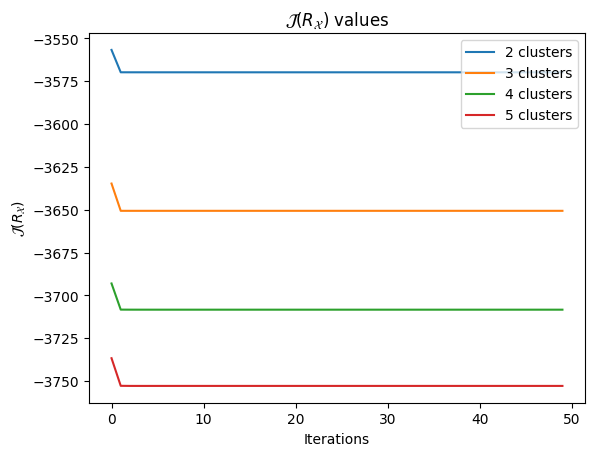

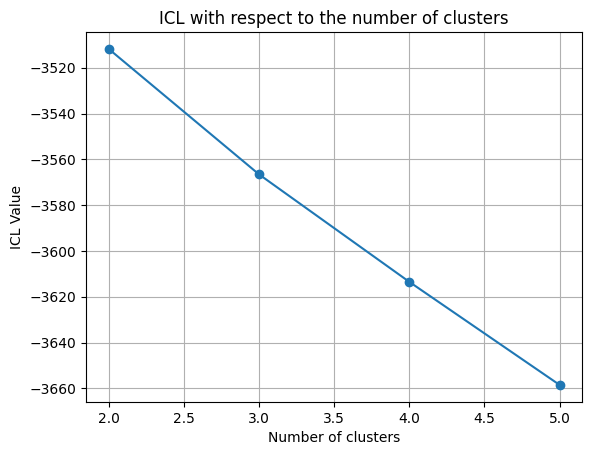

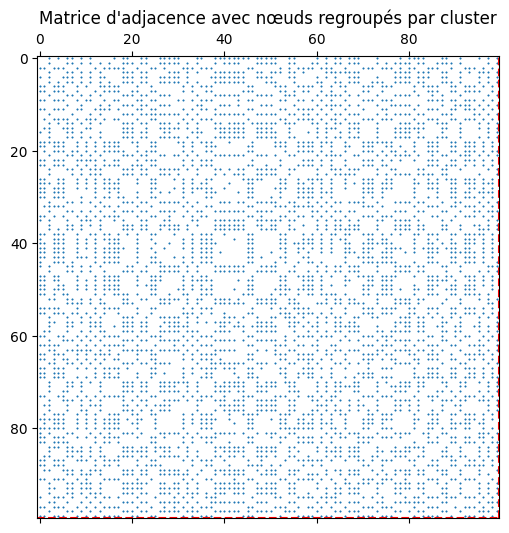

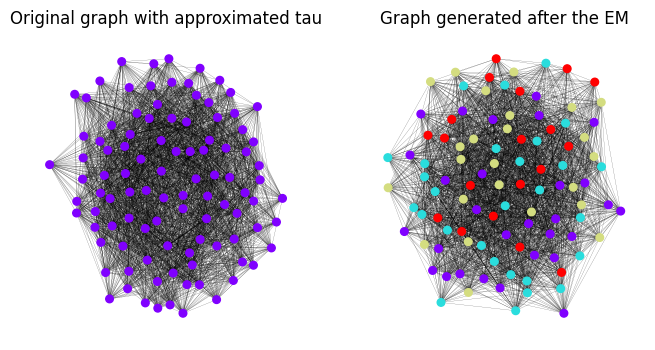

In [10]:
np.random.seed(3)
n_vertices = 100
pi = np.array([[0.1,0.9,0.1,0.1],[0.9,0.1,0.9,0.1],[0.1,0.9,0.1,0.9],[0.1,0.1,0.9,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

Fit finished for  2  clusters 
Fit finished for  3  clusters 
Fit finished for  4  clusters 
Fit finished for  5  clusters 


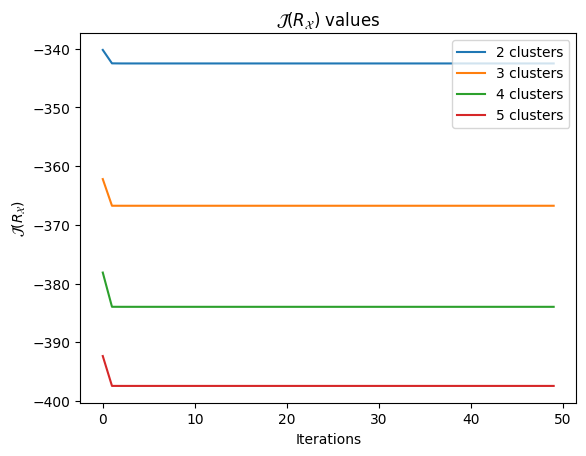

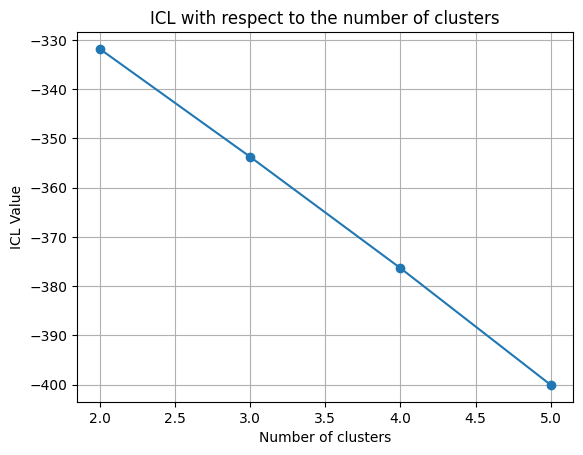

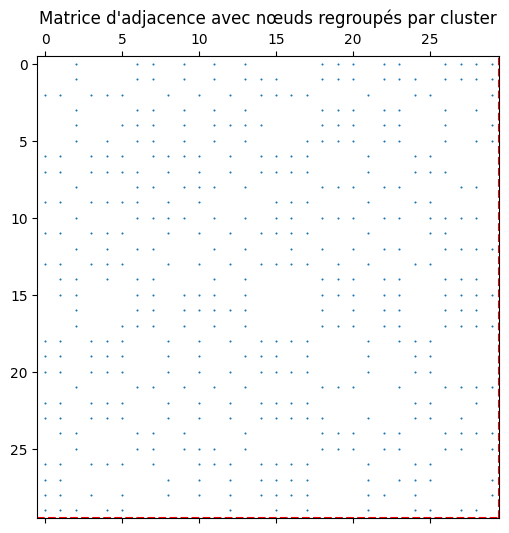

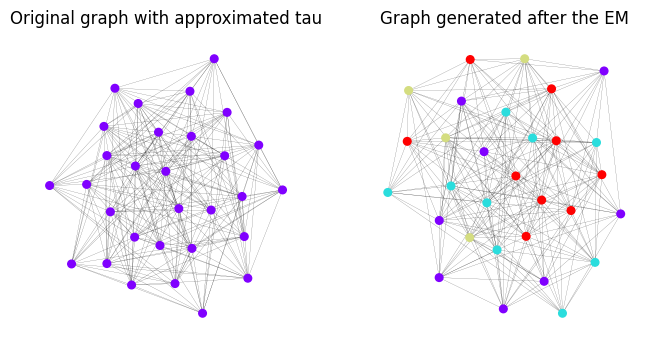

In [11]:
np.random.seed(3)
n_vertices = 30
pi = np.array([[0.1,0.9,0.1,0.1],[0.9,0.1,0.9,0.1],[0.1,0.9,0.1,0.9],[0.1,0.1,0.9,0.1]])
priors = np.array([0.1, 0.4, 0.4, 0.1])
true_n_clusters = len(priors)
max_iter = 50

graph, tau = generate_and_give_tau(n_vertices, pi , priors)

model = mixtureModel(graph, initilisation_method='random')
tab_clusters = [2,3,4,5]
model.fit(tab_clusters)

model.plot_jrx()
model.plot_icl()
model.plot_adjency_matrix(true_n_clusters)

new_graph, new_tau = generate_and_give_tau(n_vertices, model.results[true_n_clusters]['pi'] , model.results[true_n_clusters]['priors'])
show_colors_multiple_graph([graph, new_graph],[model.results[true_n_clusters]['tau'], new_tau], ['Original graph with approximated tau', 'Graph generated after the EM'])

In [7]:
print(np.mean(tau, axis = 0))

[0.1    0.4667 0.4    0.0333]


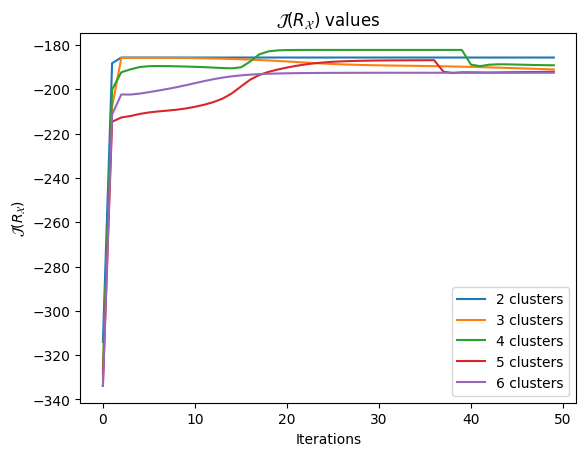

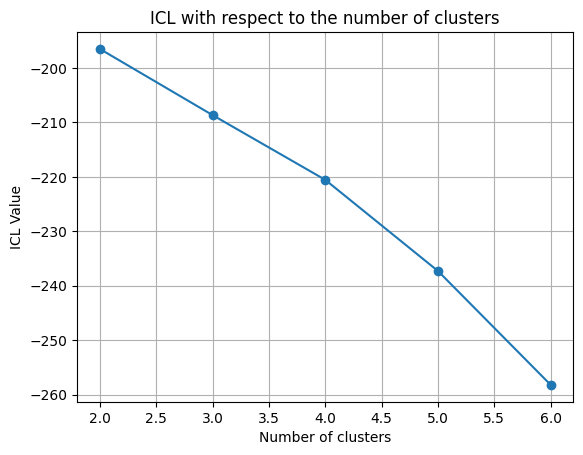

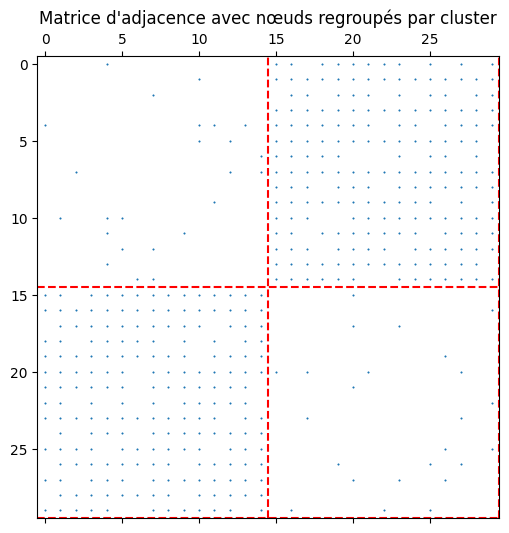

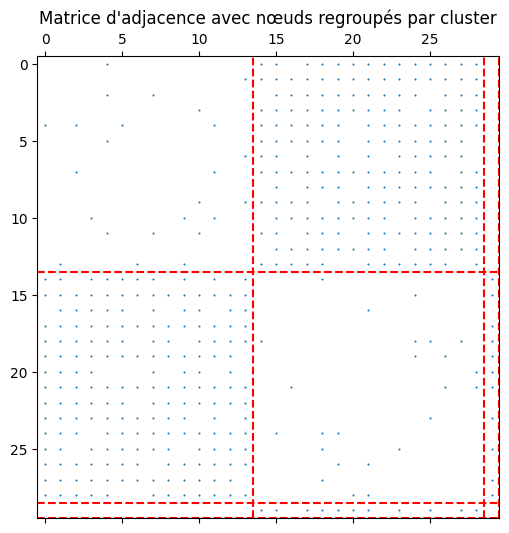

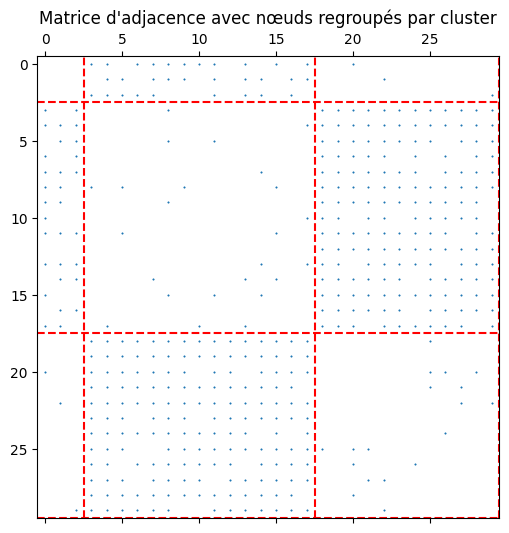

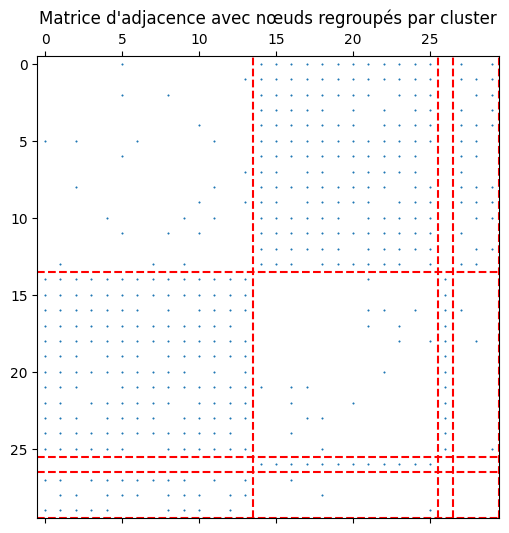

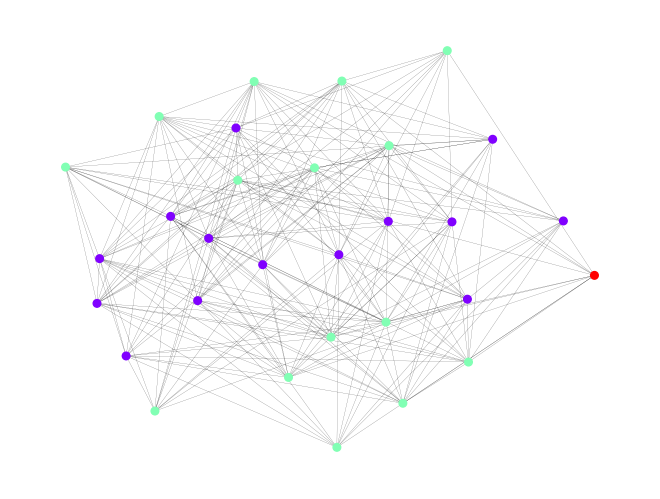

In [8]:
model2 = mixtureModel(graph, initilisation_method='spectral')
tab_clusters = [2,3,4,5,6]
model2.fit(tab_clusters)

model2.plot_jrx()
model2.plot_icl()
model2.plot_adjency_matrix(2)
model2.plot_adjency_matrix(3)
model2.plot_adjency_matrix(4)
model2.plot_adjency_matrix(5)

show_graph_cluster_color(graph, model2.results[3]['tau'])